<a href="https://colab.research.google.com/github/Kalpeshjpatil/ML_Assignment_DT.ipynb/blob/main/ML_Assignment_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics


In [ ]:
data = pd.read_csv('/content/car_evaluation.csv')
#We can check the first five samples of the data:
data.head(5)

,buying_price,maint_cost,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.shape

(1728, 7)

In [ ]:
data.columns


Index(['buying_price', 'maint_cost', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')

In [ ]:
data.isnull().sum()

buying_price    0
maint_cost      0
doors           0
persons         0
lug_boot        0
safety          0
class           0
dtype: int64

In [ ]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

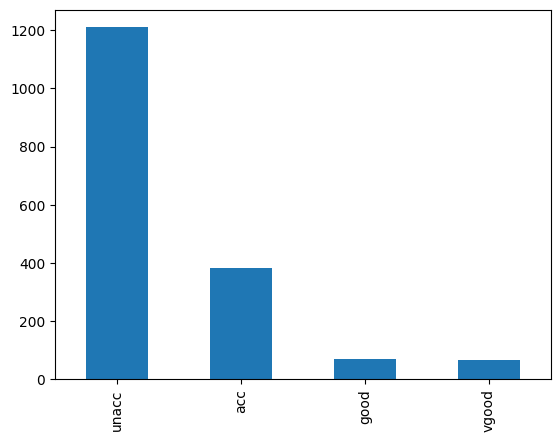

In [ ]:
data['class'].value_counts().plot(kind = 'bar')
plt.show()


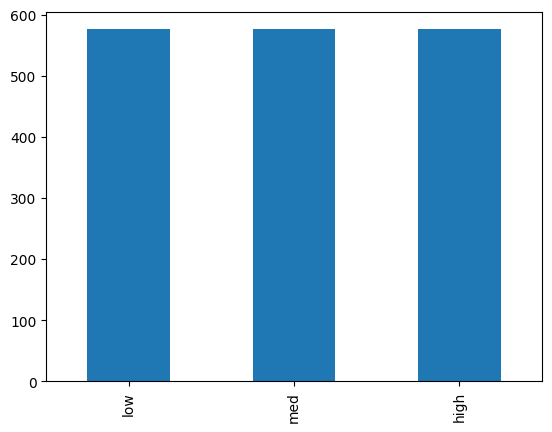

In [ ]:
data['safety'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying_price  1728 non-null   object
 1   maint_cost    1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
X = data.drop(['class'], axis = 1)
y = data['class']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
persons_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,persons_category,lug_boot_category,safety_category]
oe = OrdinalEncoder(categories= all_categories)
X = oe.fit_transform( data[['buying_price', 'maint_cost', 'doors', 'persons', 'lug_boot', 'safety']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [ ]:
DT_classifier = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 10)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [ ]:
y_pred = DT_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)



array([[ 64,   0,  50,   0],
       [ 23,   0,   0,   0],
       [ 16,   0, 351,   0],
       [ 15,   0,   0,   0]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.54      0.56      0.55       114
        good       0.00      0.00      0.00        23
       unacc       0.88      0.96      0.91       367
       vgood       0.00      0.00      0.00        15

    accuracy                           0.80       519
   macro avg       0.35      0.38      0.37       519
weighted avg       0.74      0.80      0.77       519



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


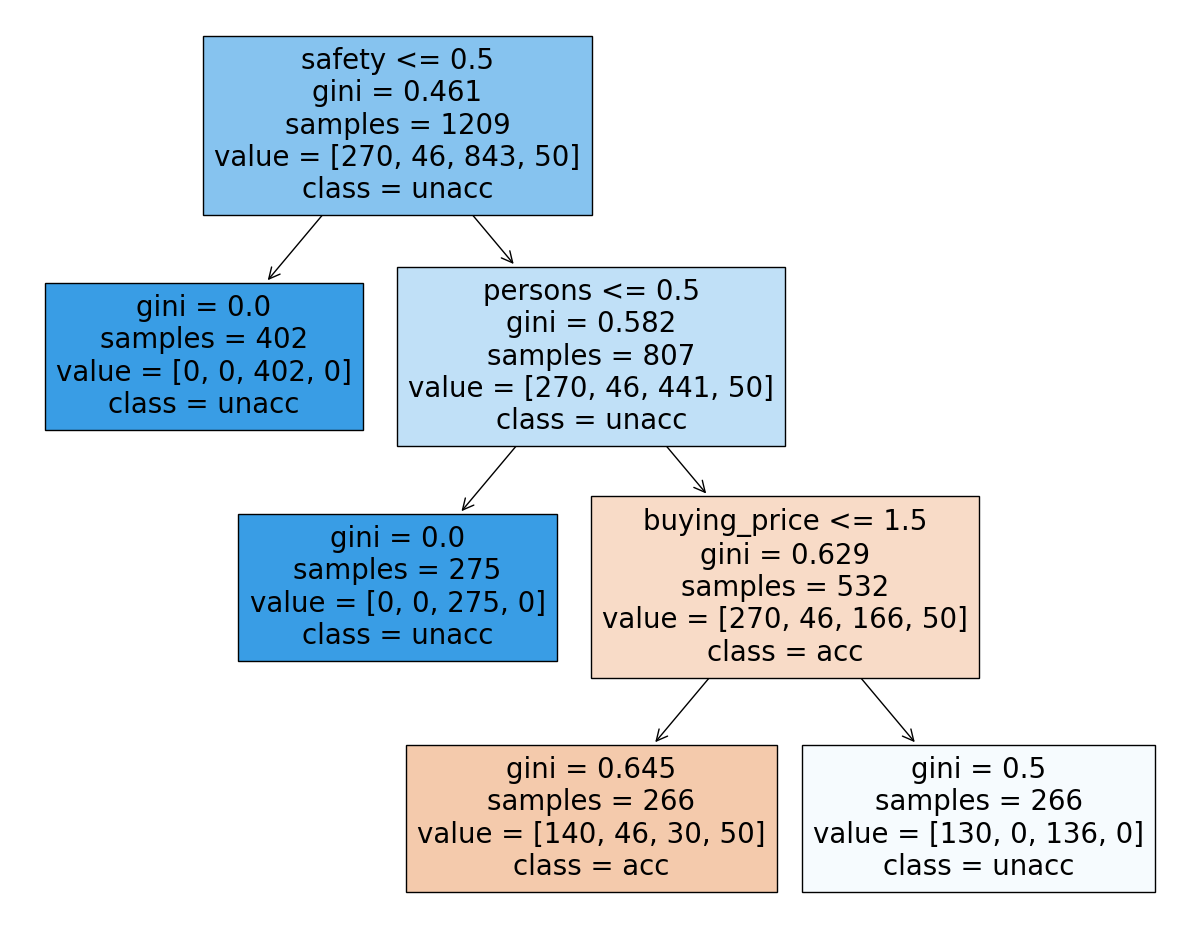

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(DT_classifier,
feature_names=data.columns[:-1],
class_names= DT_classifier.classes_, filled=True)